# Case FortBrasil
***

###  **Legenda:**
- **ID_CONTA:** Identificador da conta;
- **DT_VENCIMENTO:** Data vencimento da fatura;
- **DS_ROLAGEM:** Indicador que define se o cliente pagou a fatura do mês anterior ou não. Se o valor for *FX0* quer dizer que o cliente pagou a fatura do mês anterior e se o valor for *FX1* quer dizer que o cliente *não* pagou a fatura do mês anterior;
- **VL_FATURA:** Valor da Fatura atual.

## Questão 01
### 1.1. Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior? 
***

### Importação das bibliotecas

Seleção de bibliotecas para manipulação de dados, criação de gráficos e tradução dos meses a serem usados do inglês para o português

In [140]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None
import locale

In [141]:
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')

### Leitura da base de dados

In [142]:
df_inicial = pd.read_csv('Questão 1 - Base.txt', sep = "\t")
df_inicial.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52


### Verificação de NaN

É sempre interessante que tratemos os NaN, pois eles interferem em nossa modelagem de dados. Para esse caso, não foi encontrado nenhum.

In [143]:
# Sem registros de NaN nas colunas
df_inicial.isna().sum()

ID_CONTA         0
DT_VENCIMENTO    0
DS_ROLAGEM       0
VL_FATURA        0
dtype: int64

## Solução
### 1. Filtrar colunas importantes a serem usadas 
Após o tratamento dos dados, devemos selecionar a(s) informação(ões) útil(eis) para a manipulação dos mesmos. Assim, de acordo com o enunciado, precisamos apenas do mês da fatura emitida (DT_VENCIMENTO) e do código dos clientes que não pagaram a fatura anterior (DS_ROLAGEM).

In [144]:
df_filtrado = df_inicial[['DT_VENCIMENTO','DS_ROLAGEM']]
df_filtrado.head()

,DT_VENCIMENTO,DS_ROLAGEM
0,2019-01-01,FX0
1,2019-01-01,FX1
2,2019-01-01,FX0
3,2019-01-01,FX0
4,2019-01-01,FX1


### 2. Verificar tipo dos dados
A fase de verificação dos tipos dos dados do dataset é importante, pois temos como objetivo o percentual de faturas emitidas **por mês**, ou seja, necessitaremos filtrar as datas presentes na coluna 'DT_VENCIMENTO' e isso só é possível quando temos o datetime como tipo de dado.

In [145]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728249 entries, 0 to 2728248
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   DT_VENCIMENTO  object
 1   DS_ROLAGEM     object
dtypes: object(2)
memory usage: 41.6+ MB


### 3. Transformar object em datetime
Com base no tópico 2, constatamos que a coluna 'DT_VENCIMENTO' é do tipo *object*. Dessa maneira, devemos transformá-la em *datetime*.

In [146]:
df_filtrado['DT_VENCIMENTO'] = pd.to_datetime(df_filtrado['DT_VENCIMENTO'])

#Transformação realizada
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728249 entries, 0 to 2728248
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   DT_VENCIMENTO  datetime64[ns]
 1   DS_ROLAGEM     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 41.6+ MB


**A fim de tornar a visualização das datas mais fácil, devemos aplicar uma função lâmbda que ajusta o padrão data 'ano - mês - dia' para 'mês - ano'**

In [147]:
df_filtrado['DT_VENCIMENTO'] = df_filtrado['DT_VENCIMENTO'].apply(lambda x: x.strftime("%B - %Y"))
df_filtrado.head()

,DT_VENCIMENTO,DS_ROLAGEM
0,janeiro - 2019,FX0
1,janeiro - 2019,FX1
2,janeiro - 2019,FX0
3,janeiro - 2019,FX0
4,janeiro - 2019,FX1


### 4. Criar coluna para contagem
Assim como no desenvolvimento, usaremos um contador. Para essa situação, o contador será uma coluna *'CONTAGEM'* preenchidas com 1's. A ideia por trás dessa solução é facilitar a contagem dos *FX0 - pagamento da fatura realizado do mês anterior* e *FX1 - pagamento da fatura não realizado do mês anterior* para cada mês.

In [148]:
df_filtrado['CONTAGEM'] = 1
df_filtrado.head()

,DT_VENCIMENTO,DS_ROLAGEM,CONTAGEM
0,janeiro - 2019,FX0,1
1,janeiro - 2019,FX1,1
2,janeiro - 2019,FX0,1
3,janeiro - 2019,FX0,1
4,janeiro - 2019,FX1,1


### 5. Realizar a soma das faturas pagas e não pagas anteriormente
Nesse momento, devemos usar o 'groupby' para agrupar a soma dos dados baseada nos critérios de data ('DT_VENCIMENTO') e de pagamento ('DS_ROLAGEM'). Essa soma nos auxiliará a achar o percentual da faturas emitidas por mês no qual os clientes não pagaram a fatura anterior.

In [149]:
df_agrupamento = df_filtrado.groupby(['DT_VENCIMENTO','DS_ROLAGEM'])['CONTAGEM'].sum()
df_agrupamento

DT_VENCIMENTO     DS_ROLAGEM
abril - 2019      FX0           276950
                  FX1            25380
agosto - 2019     FX0           288331
                  FX1            28736
fevereiro - 2019  FX0           285921
                  FX1            27928
janeiro - 2019    FX0           290548
                  FX1            22835
julho - 2019      FX0           281005
                  FX1            29889
junho - 2019      FX0           278389
                  FX1            25977
maio - 2019       FX0           271544
                  FX1            30321
março - 2019      FX0           273886
                  FX1            33432
setembro - 2019   FX0           235222
                  FX1            21955
Name: CONTAGEM, dtype: int64

### 6. Porcentagem:
Por fim, chegamos ao resultado aguardado da questão.

In [150]:
#Criação de um novo DataFrame para passar os dados desejados
df_percentual_faturas_emitidas = pd.DataFrame()

#Criação do cálculo da porcentagem para cada mês
df_percentual_faturas_emitidas['% Faturas Não Pagas'] = round((df_filtrado[df_filtrado['DS_ROLAGEM'] == 'FX1'].groupby('DT_VENCIMENTO')['DS_ROLAGEM'].count())/df_filtrado.groupby('DT_VENCIMENTO')['DS_ROLAGEM'].count(),4)*100

#Colocação do índice da tabela
df_percentual_faturas_emitidas.reset_index(inplace=True)

#Chamada da tabela
df_percentual_faturas_emitidas

,DT_VENCIMENTO,% Faturas Não Pagas
0,abril - 2019,8.39
1,agosto - 2019,9.06
2,fevereiro - 2019,8.90
3,janeiro - 2019,7.29
4,julho - 2019,9.61
5,junho - 2019,8.53
6,maio - 2019,10.04
7,março - 2019,10.88
8,setembro - 2019,8.54


### 7. Representação gráfica:

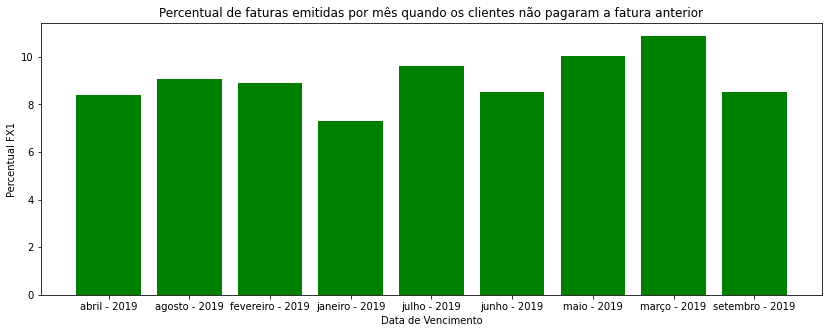

In [152]:
# Gráfico
#Difinição do tamanho do gráfico
plt.figure(figsize = (14,5))

#Definição dos dados dos eixos
plt.bar(df_percentual_faturas_emitidas['DT_VENCIMENTO'], df_percentual_faturas_emitidas['% Faturas Não Pagas'], color = 'green')

#Legenda de cada barra do eixo x
plt.xticks(df_percentual_faturas_emitidas['DT_VENCIMENTO'])

#Label para eixo y
plt.ylabel('Percentual FX1')

#Label para eixo x
plt.xlabel('Data de Vencimento')

#Título do gráfico
plt.title('Percentual de faturas emitidas por mês quando os clientes não pagaram a fatura anterior')

plt.show()

### 1.2. Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados:
- Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro);
- O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro);
- Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 
***

### Importação das bibliotecas

Seleção de bibliotecas para manipulação de dados, criação de gráficos e tradução dos meses a serem usados do inglês para o português

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None
import locale

In [96]:
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')

### Leitura da base de dados

In [97]:
df_inicial = pd.read_csv('Questão 1 - Base.txt', sep = "\t")
df_inicial.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52


## Solução
### 1. Filtrar colunas importantes a serem usadas
Para essa solução, usaremos todas as colunas presentes no dataset, logo, não faremos uma filtragem de coluna
Para o primeiro tópico devemo selecionar o intervalo de Março - Agosto

In [98]:
df_inicial.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52


### 2. Eliminar mês de setembro

In [99]:
df_inicial['MÊS'] = (pd.to_datetime(df_inicial['DT_VENCIMENTO'])).dt.month
df_inicial.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MÊS
0,402467,2019-01-01,FX0,210.00,1
1,403001,2019-01-01,FX1,1097.18,1
2,403499,2019-01-01,FX0,1209.88,1
3,403670,2019-01-01,FX0,667.40,1
4,404183,2019-01-01,FX1,1239.52,1


In [100]:
df_setembro = df_inicial[df_inicial['MÊS'] == 9]
df_setembro.drop(['VL_FATURA','MÊS'],axis=1,inplace=True)
df_setembro.reset_index(drop=True,inplace=True)
df_setembro.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM
0,99416,2019-09-01,FX0
1,52706,2019-09-01,FX0
2,1024221,2019-09-01,FX0
3,1024238,2019-09-01,FX0
4,1024293,2019-09-01,FX0


### 3. Considerar faturas de março até agosto (6 meses)

In [101]:
# Filtrar meses
df_filtro_mes = ((df_inicial['DT_VENCIMENTO'] >= '2019-03-01') & (df_inicial['DT_VENCIMENTO'] < '2019-09-01'))

In [102]:
df_seis_meses = df_inicial[df_filtro_mes]
df_seis_meses.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MÊS
464874,1624902,2019-08-08,FX0,226.62,8
464875,1624908,2019-08-08,FX0,921.09,8
464876,1624916,2019-08-08,FX0,1456.75,8
464877,1624951,2019-08-08,FX0,70.11,8
464878,1624975,2019-08-08,FX0,49.05,8


### 4. Transformar a coluna 'DS_ROLAGEM' em contador

In [103]:
df_seis_meses['DS_ROLAGEM'] = df_seis_meses['DS_ROLAGEM'].apply(lambda x : 0 if (x == 'FX0') or (x == 0) else 1)
df_seis_meses.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,MÊS
464874,1624902,2019-08-08,0,226.62,8
464875,1624908,2019-08-08,0,921.09,8
464876,1624916,2019-08-08,0,1456.75,8
464877,1624951,2019-08-08,0,70.11,8
464878,1624975,2019-08-08,0,49.05,8


### 5. Realizar transformação de cada coluna para o que é pedido

In [115]:
quantidade_fatura = pd.DataFrame(df_seis_meses.groupby('ID_CONTA')['ID_CONTA'].count()).rename(columns = {'ID_CONTA' : 'QTD_FATURAS_ULT_6M'}).reset_index()
df_setembro = df_setembro.merge(quantidade_fatura, how = 'inner', on = 'ID_CONTA')
quantidade_fatura.head()

,ID_CONTA,QTD_FATURAS_ULT_6M
0,27717,6
1,27789,6
2,29643,1
3,29766,1
4,30256,6


In [119]:
valor_medio = pd.DataFrame(df_seis_meses.groupby('ID_CONTA')['VL_FATURA'].mean()).rename(columns = {'VL_FATURA' : 'VL_MEDIO_FATURA'}).reset_index()
df_setembro = df_setembro.merge(valor_medio, how = 'inner', on = 'ID_CONTA')
valor_medio.head()

,ID_CONTA,VL_MEDIO_FATURA
0,27717,1623.128333
1,27789,913.355000
2,29643,115.940000
3,29766,47.630000
4,30256,441.881667


In [123]:
quantidade_fatura_nao_paga = pd.DataFrame(df_seis_meses.groupby('ID_CONTA')['DS_ROLAGEM'].sum()).rename(columns = {'DS_ROLAGEM' : 'QTD_FATURAS_ULT_6M_FX1'}).reset_index()
df_setembro = df_setembro.merge(quantidade_fatura_nao_paga, how = 'inner', on = 'ID_CONTA')
quantidade_fatura_nao_paga.head()

,ID_CONTA,QTD_FATURAS_ULT_6M_FX1
0,27717,0
1,27789,0
2,29643,1
3,29766,0
4,30256,0


### 5. Gerar novo DataFrame


In [124]:
df_setembro = df_setembro[['ID_CONTA', 'DS_ROLAGEM','DT_VENCIMENTO', 'QTD_FATURAS_ULT_6M','VL_MEDIO_FATURA','QTD_FATURAS_ULT_6M_FX1']]
df_setembro.head()

,ID_CONTA,DS_ROLAGEM,DT_VENCIMENTO,QTD_FATURAS_ULT_6M,VL_MEDIO_FATURA,QTD_FATURAS_ULT_6M_FX1
0,99416,FX0,2019-09-01,6,2791.616667,0
1,52706,FX0,2019-09-01,6,309.641667,0
2,1024221,FX0,2019-09-01,6,295.175000,0
3,1024238,FX0,2019-09-01,6,870.556667,0
4,1024293,FX0,2019-09-01,6,1646.751667,0
